## Statistical Analysis in Data Science

In [1]:
# data wrangling libraries
import pandas as pd
import numpy as np


# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# the statistical analysis libraries
from scipy import stats

# configuring the chart
sns.set_style('darkgrid')
sns.set_palette('husl')


In [2]:
data = pd.read_csv('orders_data.csv')

In [3]:
data.head(5)

,Unnamed: 0,id,country,shipeddate,shipper,customer,price,quantity,requireddate,employee,order value,price class,waiting days,delivery_class,net_sales
0,0,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,50.0,12,1996-09-26,Nancy Davolio,600.0,low,0.0,early,576.000
1,1,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,3.6,10,1996-09-26,Nancy Davolio,36.0,low,0.0,early,34.560
2,2,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,35.1,5,1996-09-26,Nancy Davolio,175.5,low,0.0,early,168.480
3,3,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,6.2,6,1996-09-26,Nancy Davolio,37.2,low,0.0,early,35.712
4,4,10306,Spain,1996-09-23,Federal Shipping,Romero y tomillo,20.7,10,1996-10-14,Nancy Davolio,207.0,low,0.0,early,198.720


In [4]:
px.scatter(data_frame= data, x = 'price', y = 'quantity',
           title = 'unit price vs quantity')

In [5]:
df_dict = {'age' : [52,43,34,25,23,20,18,15],
           'income': [200,400,500,550,600,675,700,1000],
           'savings': [180,160,140,120,500,80,440,50]
           }
df = pd.DataFrame(df_dict)

px.scatter(data_frame=df, x = 'income', y = 'savings')

# Correlation test

1. spearman rank correlation
2. pearson correlation
3. kendall Tau correlation

#### interpreting correlation coefficient
* -1 < p < 1
* less than 0.1 zero correlation
* less than - 0.4 -- weak  negative correlation
* less than - 0.6 -- moderate negative correlation
* less than - 0.99 -- strong  negative correlation
* less than  +0.4 -- weak  posittive correlation
* less than + 0.6 -- moderate positive correlation
* less than + 0.99 -- strong  positive correlation


In [6]:
dummy_corr = df.corr(method = 'kendall')


dummy_corr


,age,income,savings
age,1.000000,-1.000000,0.357143
income,-1.000000,1.000000,-0.357143
savings,0.357143,-0.357143,1.000000


Text(0.5, 0.98, 'CORRELATION  MATRIX OF THE CONTINUOUS VARIABLES')

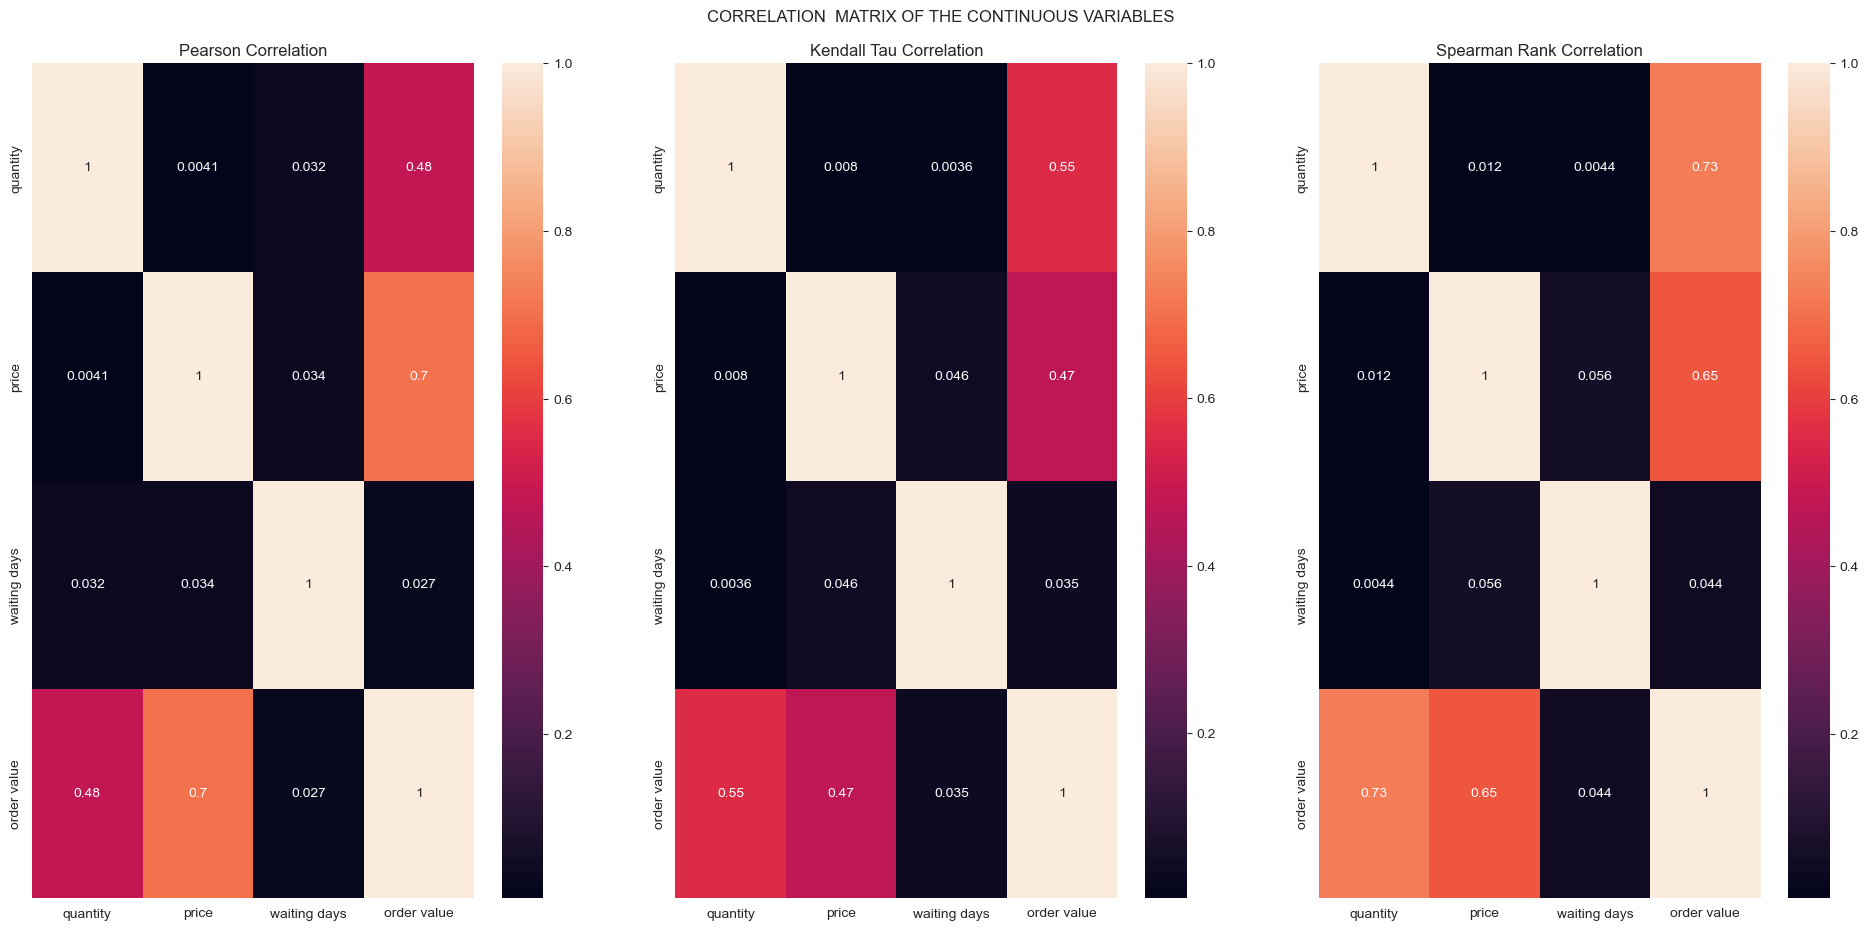

In [7]:
data_num =data[['quantity','price','waiting days','order value']]



data_num_p = data_num.corr(method = 'pearson')
data_num_k = data_num.corr(method = 'kendall')
data_num_s = data_num.corr(method = 'spearman')

fig, axes = plt.subplots(1,3, figsize = (20,10))

sns.heatmap(data = data_num_p, annot= True, ax = axes[0])
sns.heatmap(data = data_num_k, annot= True, ax = axes[1])
sns.heatmap(data = data_num_s, annot= True, ax = axes[2])


fig.tight_layout(pad = 5.0)

axes[0].set_title('Pearson Correlation')
axes[1].set_title('Kendall Tau Correlation')
axes[2].set_title('Spearman Rank Correlation')


plt.suptitle('CORRELATION  MATRIX OF THE CONTINUOUS VARIABLES')

### TEST OF HYPOTHESIS

* NULL HYPOTHESIS -- HO -- p_value >= 0.05
* ALTERNATIVE HYPOTHESIS -- H1 p_value < 0.05

* level of significance (alpha) -- 0.05











In [8]:
ho = 'There is no significant linear relationship between the variables in question'
h1 = 'There is a significant linear relatioship between the variables in question'


corr_value = stats.pearsonr(x = data_num['order value'], y = data_num['price'])[0]
pvalue = stats.pearsonr(x = data_num['order value'], y = data_num['price'])[1]

if pvalue < 0.05:
    print(h1)
    print(f'correlation is : {corr_value}')
else:
    print(ho)


There is a significant linear relatioship between the variables in question
correlation is : 0.7034946571816028


### Checking the assumptions of correlation

* Linearity
* continuous variable
* absense of Outlier 
* Normality

Text(0.5, 0.98, 'NORMALITY AND OUTLIER DETECTION')

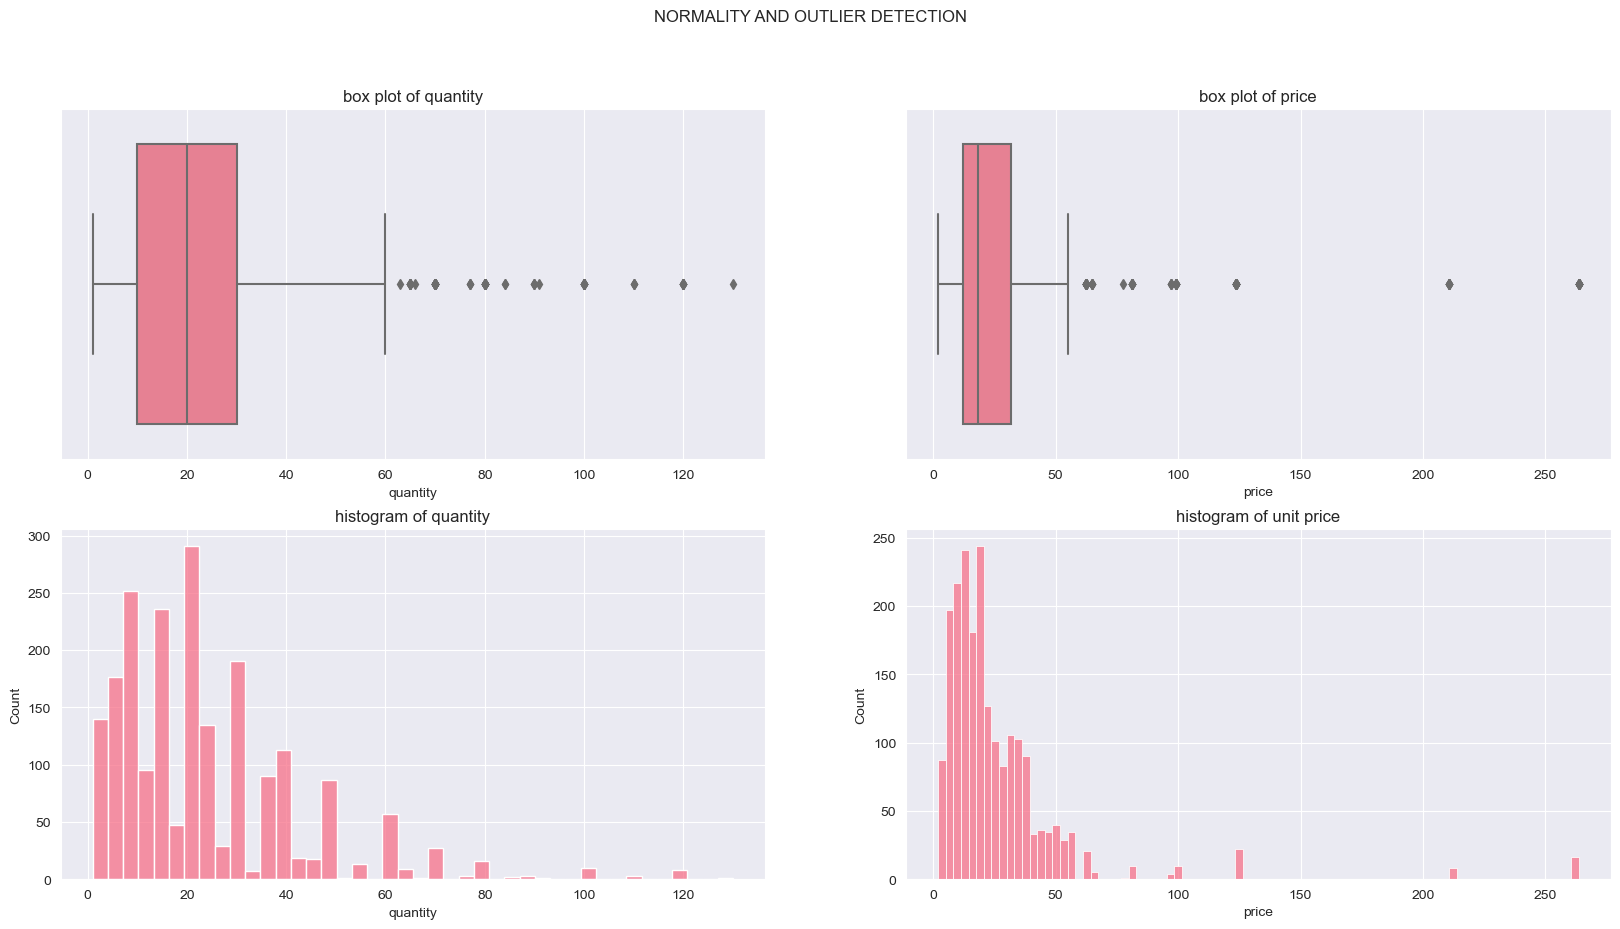

In [12]:
# outlier detection and normality inspection  with charts

fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.boxplot(data = data, x = 'quantity', ax = axes[0,0])
sns.boxplot(data = data, x = 'price', ax = axes[0,1])
sns.histplot(data = data, x = 'quantity', ax = axes[1,0])
sns.histplot(data = data, x = 'price', ax = axes[1,1])


axes[0,0].set_title('box plot of quantity')
axes[0,1].set_title('box plot of price')
axes[1,0].set_title('histogram of quantity')
axes[1,1].set_title('histogram of unit price')

plt.suptitle('NORMALITY AND OUTLIER DETECTION')

In [17]:
## CHI SQUARE TEST OF ASSOCIATION

data_num['price_class'] = ['low' if x <= 12 else 'mid' if x <= 18 else 'high' if x <= 50 
                           else 'luxury' for x in data_num['price']]

data_num['quantity_class'] = ['low' if x <= 10 else 'medium' if x <= 20 else 'high' if x <= 50
                           else 'very high' for x in data_num['quantity']]

C:\Users\hp\AppData\Local\Temp\ipykernel_20224\76149100.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_20224\76149100.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
data_num.head()

,quantity,price,waiting days,order value,price_class,quantity_class
0,12,50.0,0.0,600.0,high,medium
1,10,3.6,0.0,36.0,low,low
2,5,35.1,0.0,175.5,high,low
3,6,6.2,0.0,37.2,low,low
4,10,20.7,0.0,207.0,high,low


In [20]:
# create a decision rule function

def decision(p_value,alpha,x,y):
    Ho = f'There is no significant relationship between {x} and {y}'
    H1 = f'There is significant relationship between {x} and {y}'
    
    print(f'The p value is :{p_value}')
    if p_value < alpha:
        return H1
    else:
        return Ho

In [28]:
data_chi = pd.crosstab(data_num['price_class'], data_num['quantity_class'])

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_chi)

decision(p_value = chi_pvalue, alpha= 0.05, x = 'price_class', y = 'quantity_class')


The p value is :0.7760313387998683


'There is no significant relationship between price_class and quantity_class'

In [31]:
data_num['delivery'] = ['early' if x <= 0 else 'late' if 
                        x <= 7 else 'very late' for x in data_num['waiting days']]


C:\Users\hp\AppData\Local\Temp\ipykernel_20224\2984990929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
data_chi = pd.crosstab(data_num['delivery'], data_num['quantity_class'])

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_chi)

decision(p_value = chi_pvalue, alpha= 0.05, x = 'delivery', y = 'quantity_class')

The p value is :0.9383645828270758


'There is no significant relationship between delivery and quantity_class'

## Analysis of Variance (ANOVA)

## Kruskal Walis Test

In [4]:
united_package = data[data['shipper'] == 'United Package']['waiting days']
federal_shipping = data[data['shipper'] == 'Federal Shipping']['waiting days']
speedy_express = data[data['shipper'] == 'Speedy Express']['waiting days']


kruskal_stats, kruskal_pvalue = stats.kruskal(united_package,federal_shipping,speedy_express)

ho = 'There is no significant difference between the shipping companies in terms of waiting days'
h1 = 'There is a significant difference between the shipping companies in terms of waiting days'

alpha = 0.05


print(f'The p value is: {kruskal_pvalue}')

if kruskal_pvalue < alpha:
    print(h1)
else:
    print(ho)


The p value is: 0.7088414025129719
There is no significant difference between the shipping companies in terms of waiting days


In [40]:
united_package

116     0.0
117     0.0
118     0.0
119     0.0
120     0.0
       ... 
2050    0.0
2051    0.0
2052    0.0
2053    0.0
2054    0.0
Name: waiting days, Length: 812, dtype: float64

In [47]:
data['employee'].nunique()

9

## ONE WAY ANOVA

In [5]:
from scipy.stats import f_oneway


f_oneway(united_package, speedy_express, federal_shipping)


F_onewayResult(statistic=2.3421624248307618, pvalue=0.09637314014571591)

In [7]:
# normality shapiro wilk test/kolmogrov-smirnov test
# equality of variance batlett test
# absence or minimal outliers box plot


from scipy.stats import bartlett

bart_test, bart_pvalue = bartlett(united_package,speedy_express,federal_shipping)

if bart_pvalue <= 0.05:
    print(f'Equality of variance not met because p_value is {bart_pvalue}')
else:
    print(f'Equal variance with pvalue {bart_pvalue}')





Equality of variance not met because p_value is 3.2973922230702094e-36


In [10]:
# test of normality
from scipy.stats import shapiro

x, shapiro_pvalue = shapiro(data['waiting days'])

if shapiro_pvalue <= 0.05:
    print(f'Normality not met because p_value is {shapiro_pvalue}')
else:
    print(f'Normally distributed with pvalue {shapiro_pvalue}')

Normality not met because p_value is 0.0


# Linear Regression

In [11]:
import statsmodels.api as sm

In [13]:
data_dict = {
    
    'student_id' : [1,2,3,4,5,6,7,8,9,10],
    'hours': [2,4,3,5,6,7,1,2,3,5],
    'english' : [52,54,53,55,56,57,21,32,53,55],
    'maths' : [82,74,73,95,97,100,15,80,63,985]
}

scores = pd.DataFrame(data_dict)

In [16]:
X = sm.add_constant(scores[['hours', 'english']])

model = sm.OLS(scores['maths'], X).fit()

model.summary()

c:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maths   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.181
Method:                 Least Squares   F-statistic:                    0.3102
Date:                Fri, 15 Dec 2023   Prob (F-statistic):              0.743
Time:                        15:03:56   Log-Likelihood:                -69.890
No. Observations:                  10   AIC:                             145.8
Df Residuals:                       7   BIC:                             146.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.0417    456.669     -0.123      0.906   -1135.892    1023.809
hours         32.4250     78.981      0.411      0.694    -154.336     219.186
english        2.0333     12.584      0.162      0.876     -27.723      31.789
==============================================================================
Omnibus:                       24.787   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.594
Skew:                           2.416   Prob(JB):                     0.000151
Kurtosis:                       7.345   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""